In [ ]:

!nvidia-smi

Fri May 16 05:22:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# !pip install tensorflow==2.13.0


!pip install tensorflow==2.18.0 typing-extensions==4.12.2 numpy==1.26.4



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 85.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.13.0
    Uninstalling tensorboard-2.13.0:
      Successfully uninstalled tensorboard-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Unins

In [ ]:
!pip install ultralytics


In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:

!pip install roboflow


In [ ]:


# ✅ Step 3: Rename or correct the dataset path (remove space in folder name)
# Your folder "yolo dataet" has a space, which causes issues. Rename it first from Drive manually to: "yolo_dataset"
# Let's define the correct dataset path:

dataset_path = "/content/drive/MyDrive/yolo_dataset"



# ✅ Step 5: Train the YOLOv8n model
!yolo task=detect mode=train model=yolov8n.pt data="/content/drive/MyDrive/yolo_dataset/data.yaml" epochs=100 imgsz=650 plots=True


Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=650, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, po

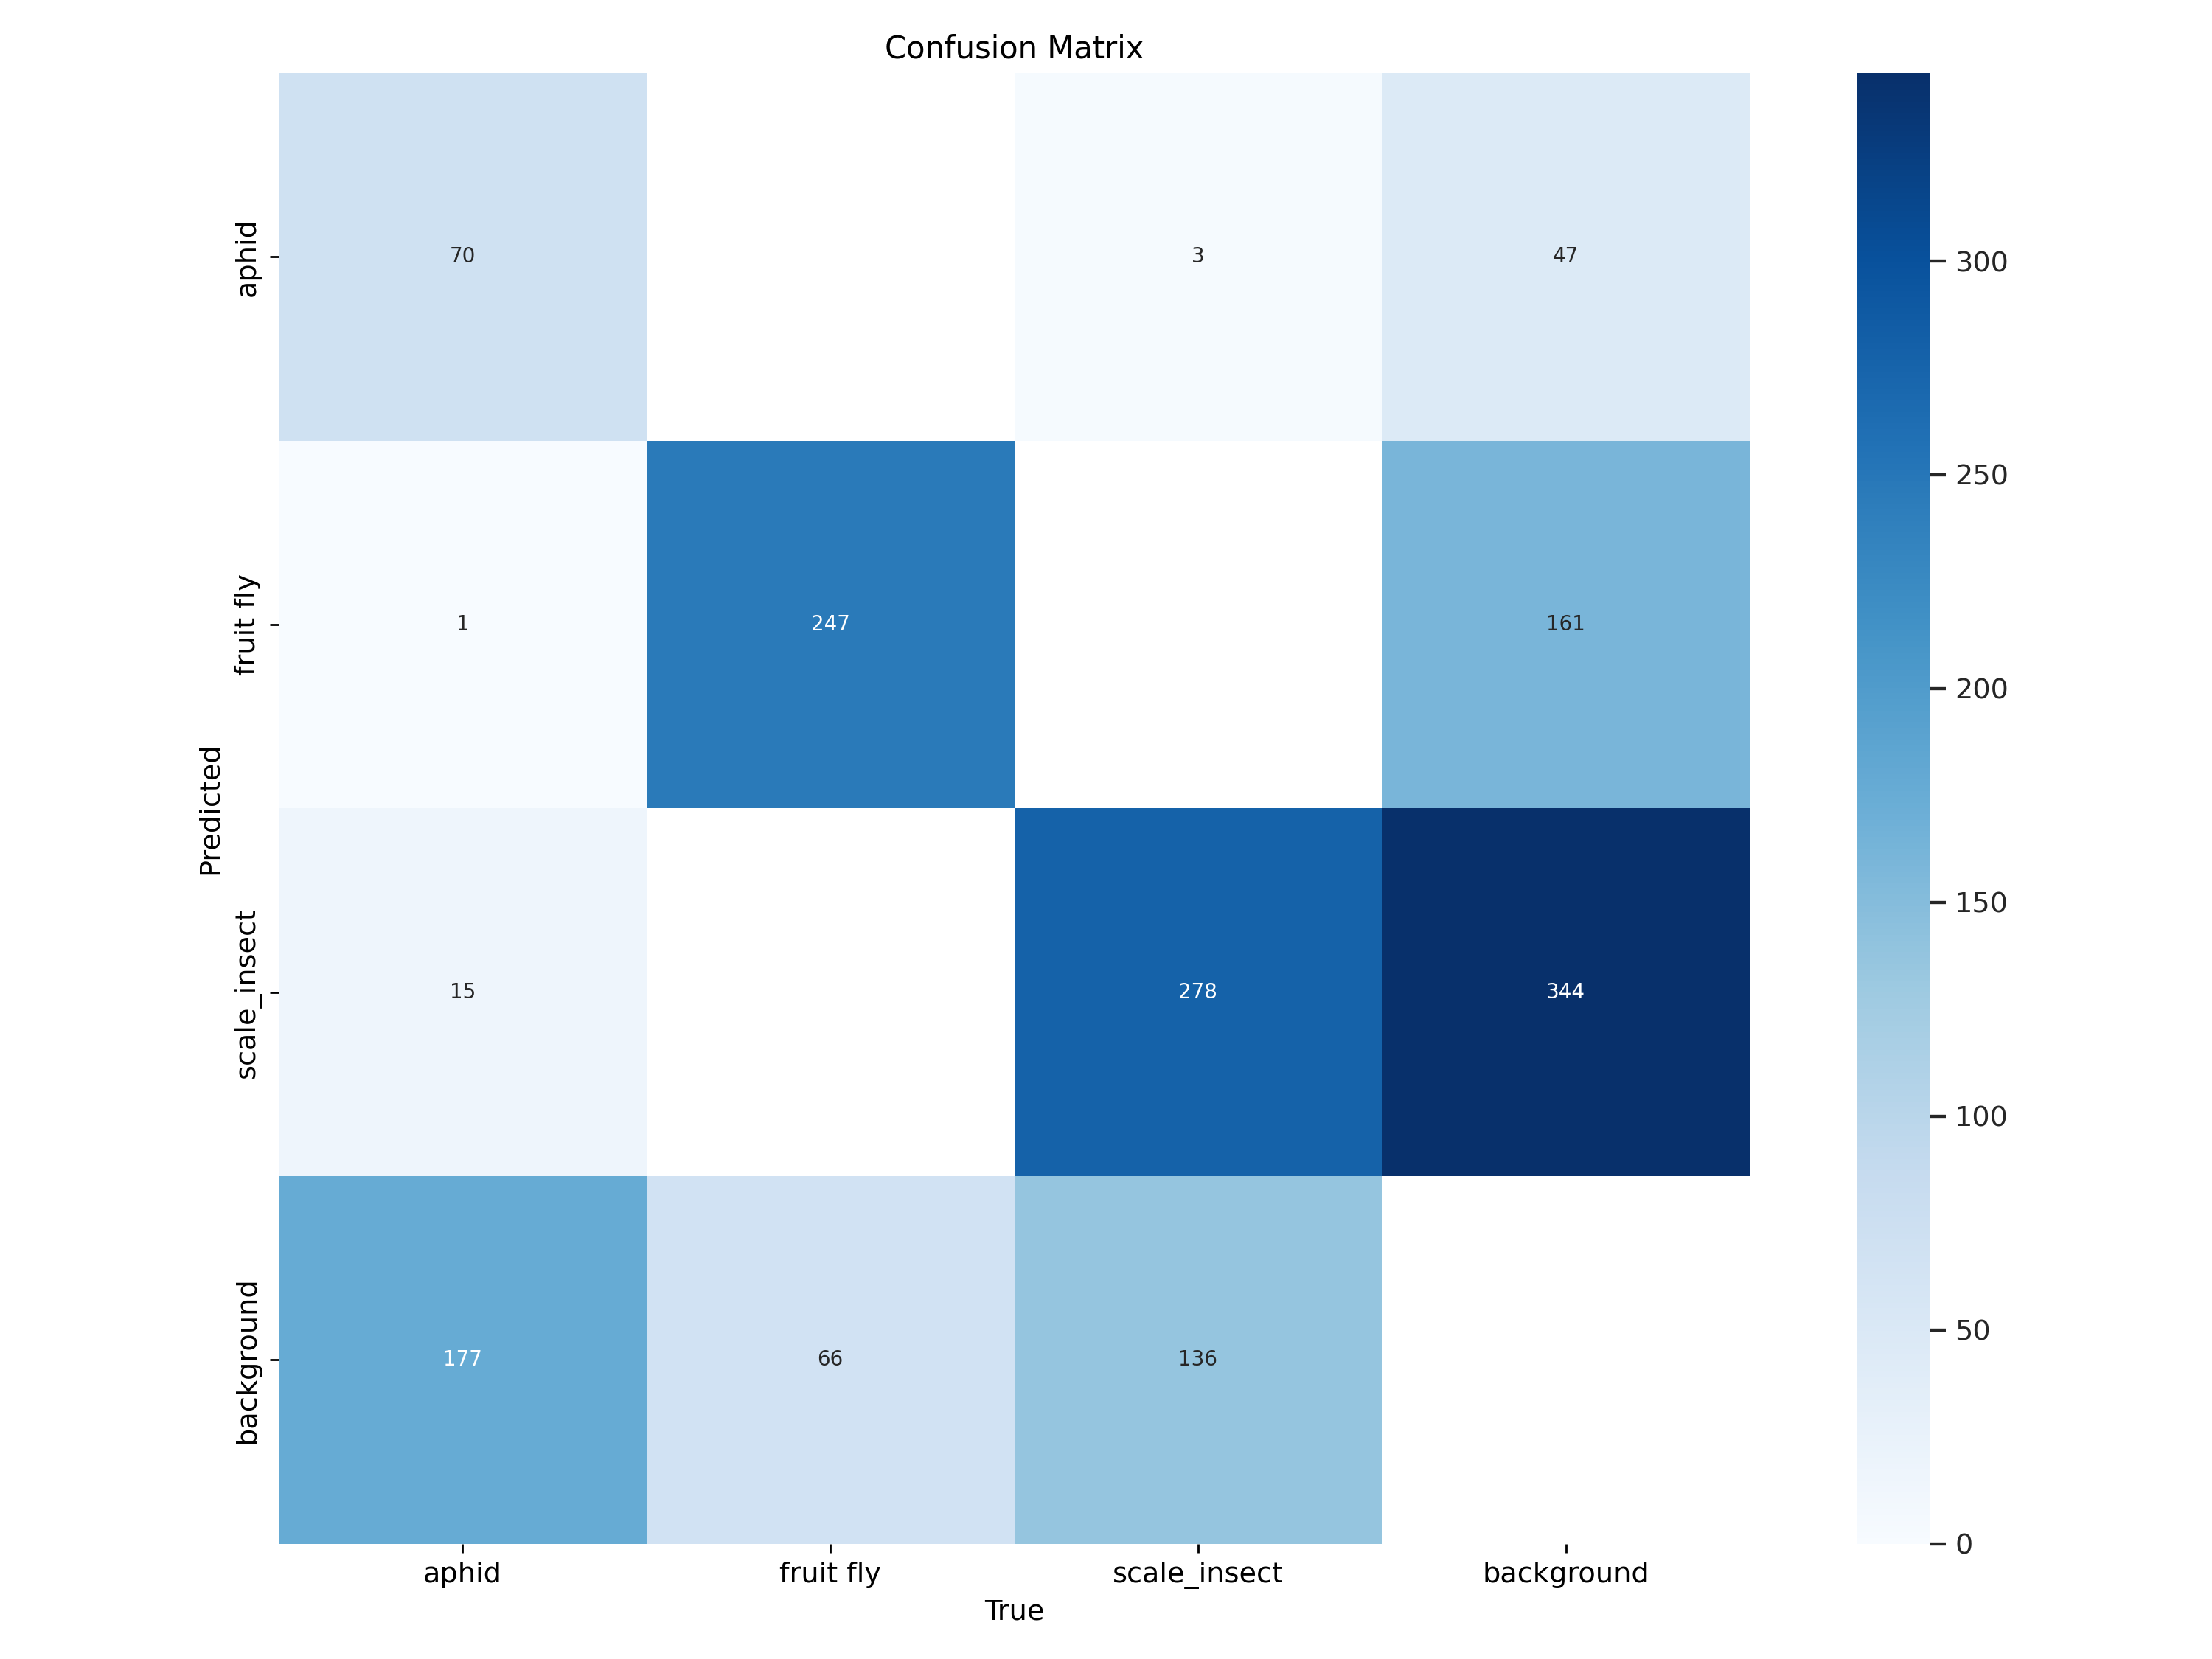

In [ ]:
conf_matrix_path = "/content/runs/detect/train2/confusion_matrix.png"

# Display the image
display(Image(filename=conf_matrix_path))


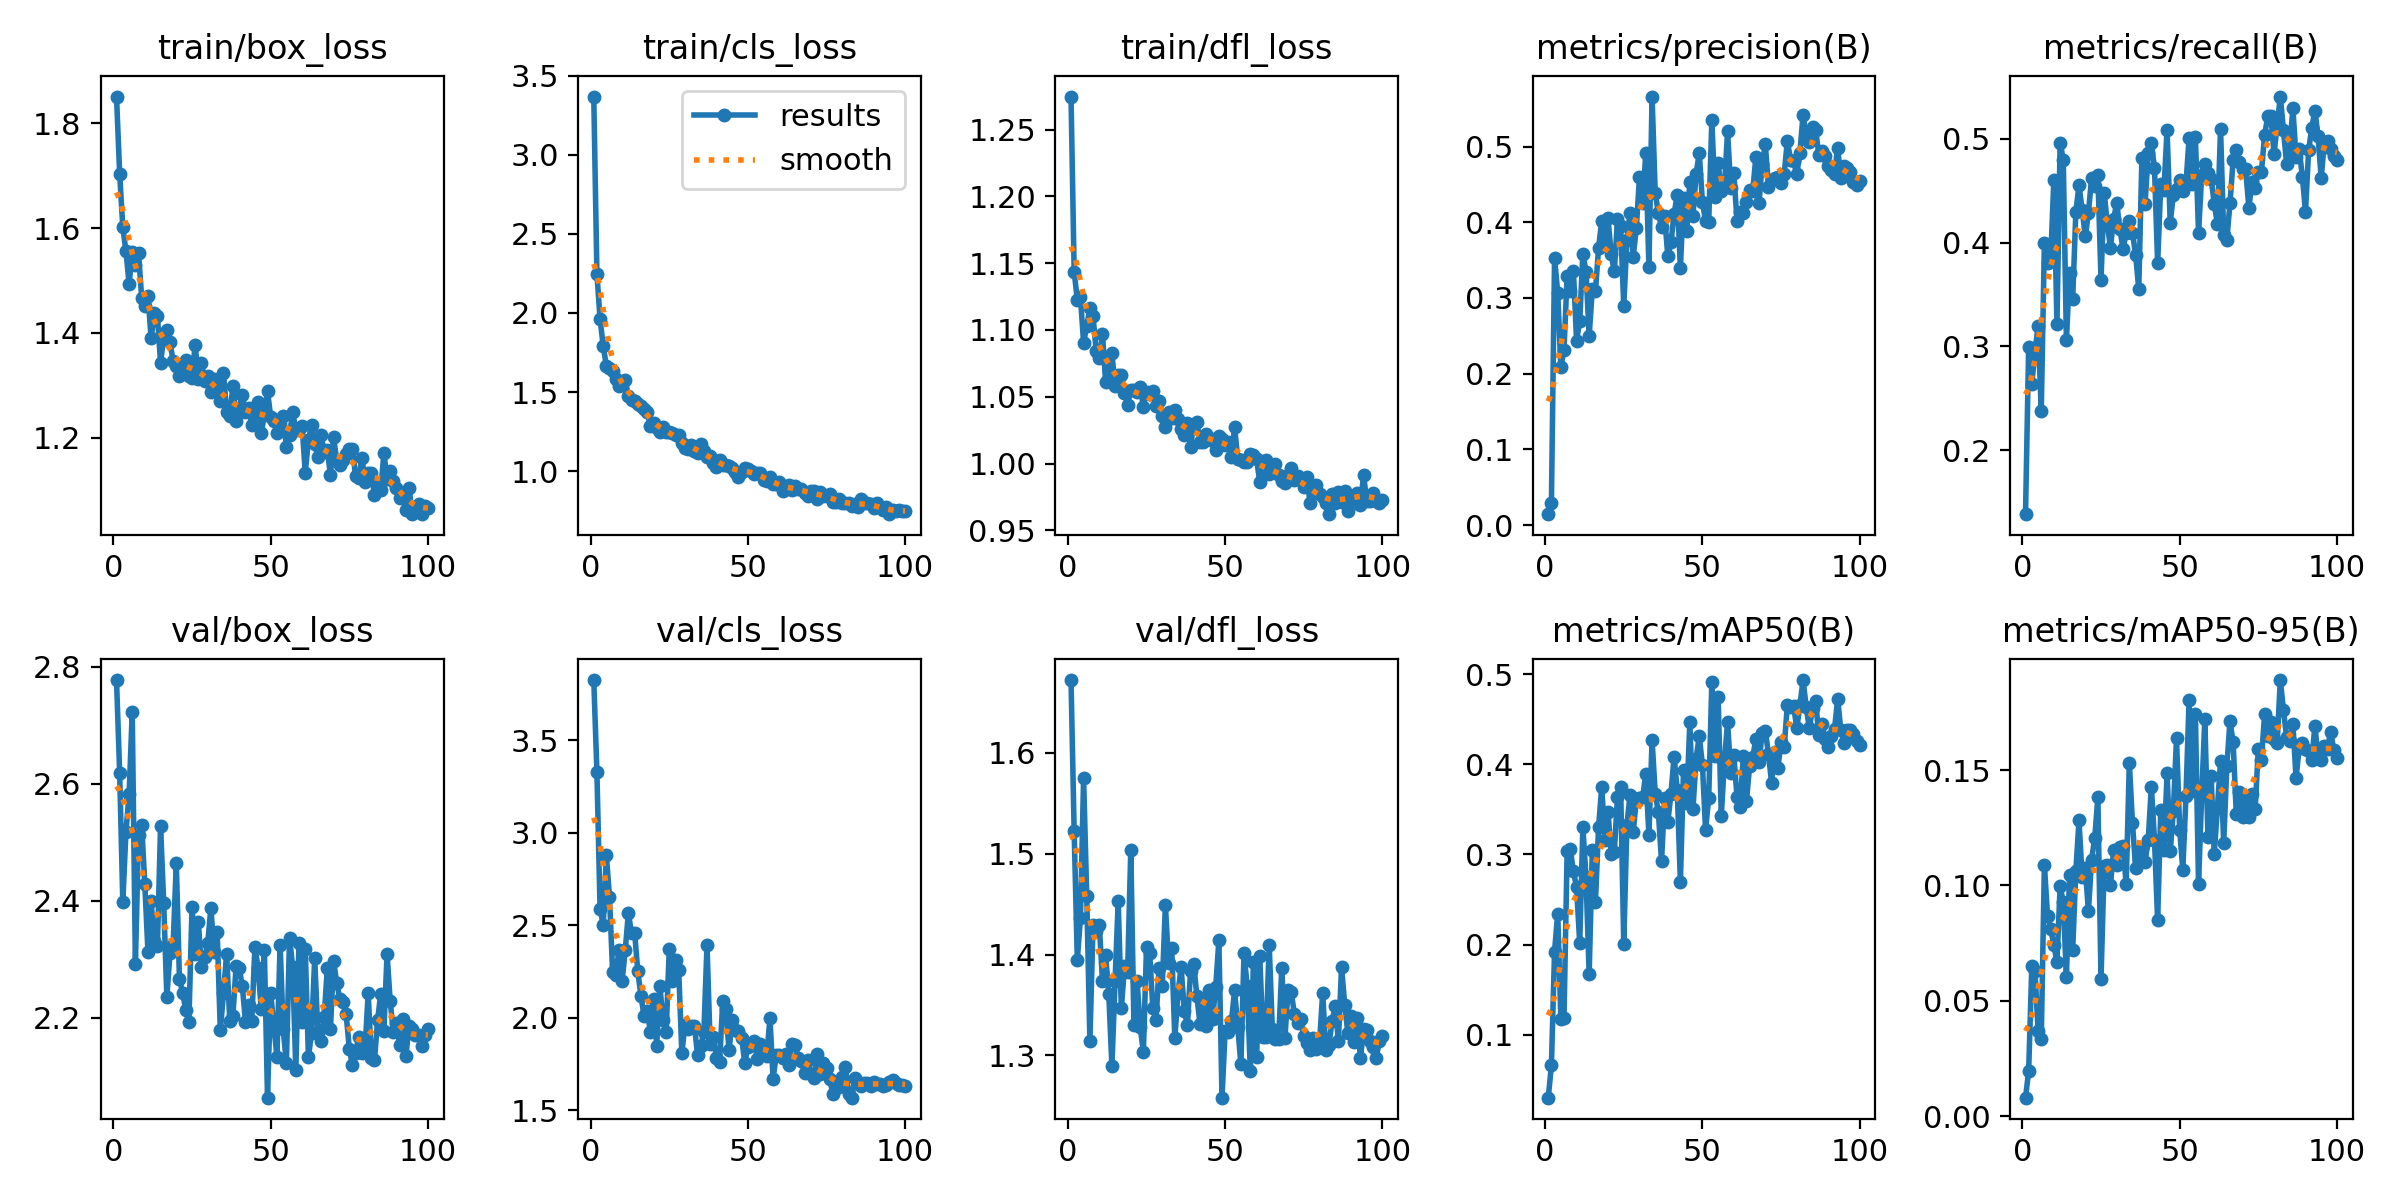

In [ ]:
Results = "/content/runs/detect/train2/results.png"

# Display the image
display(Image(filename=Results))



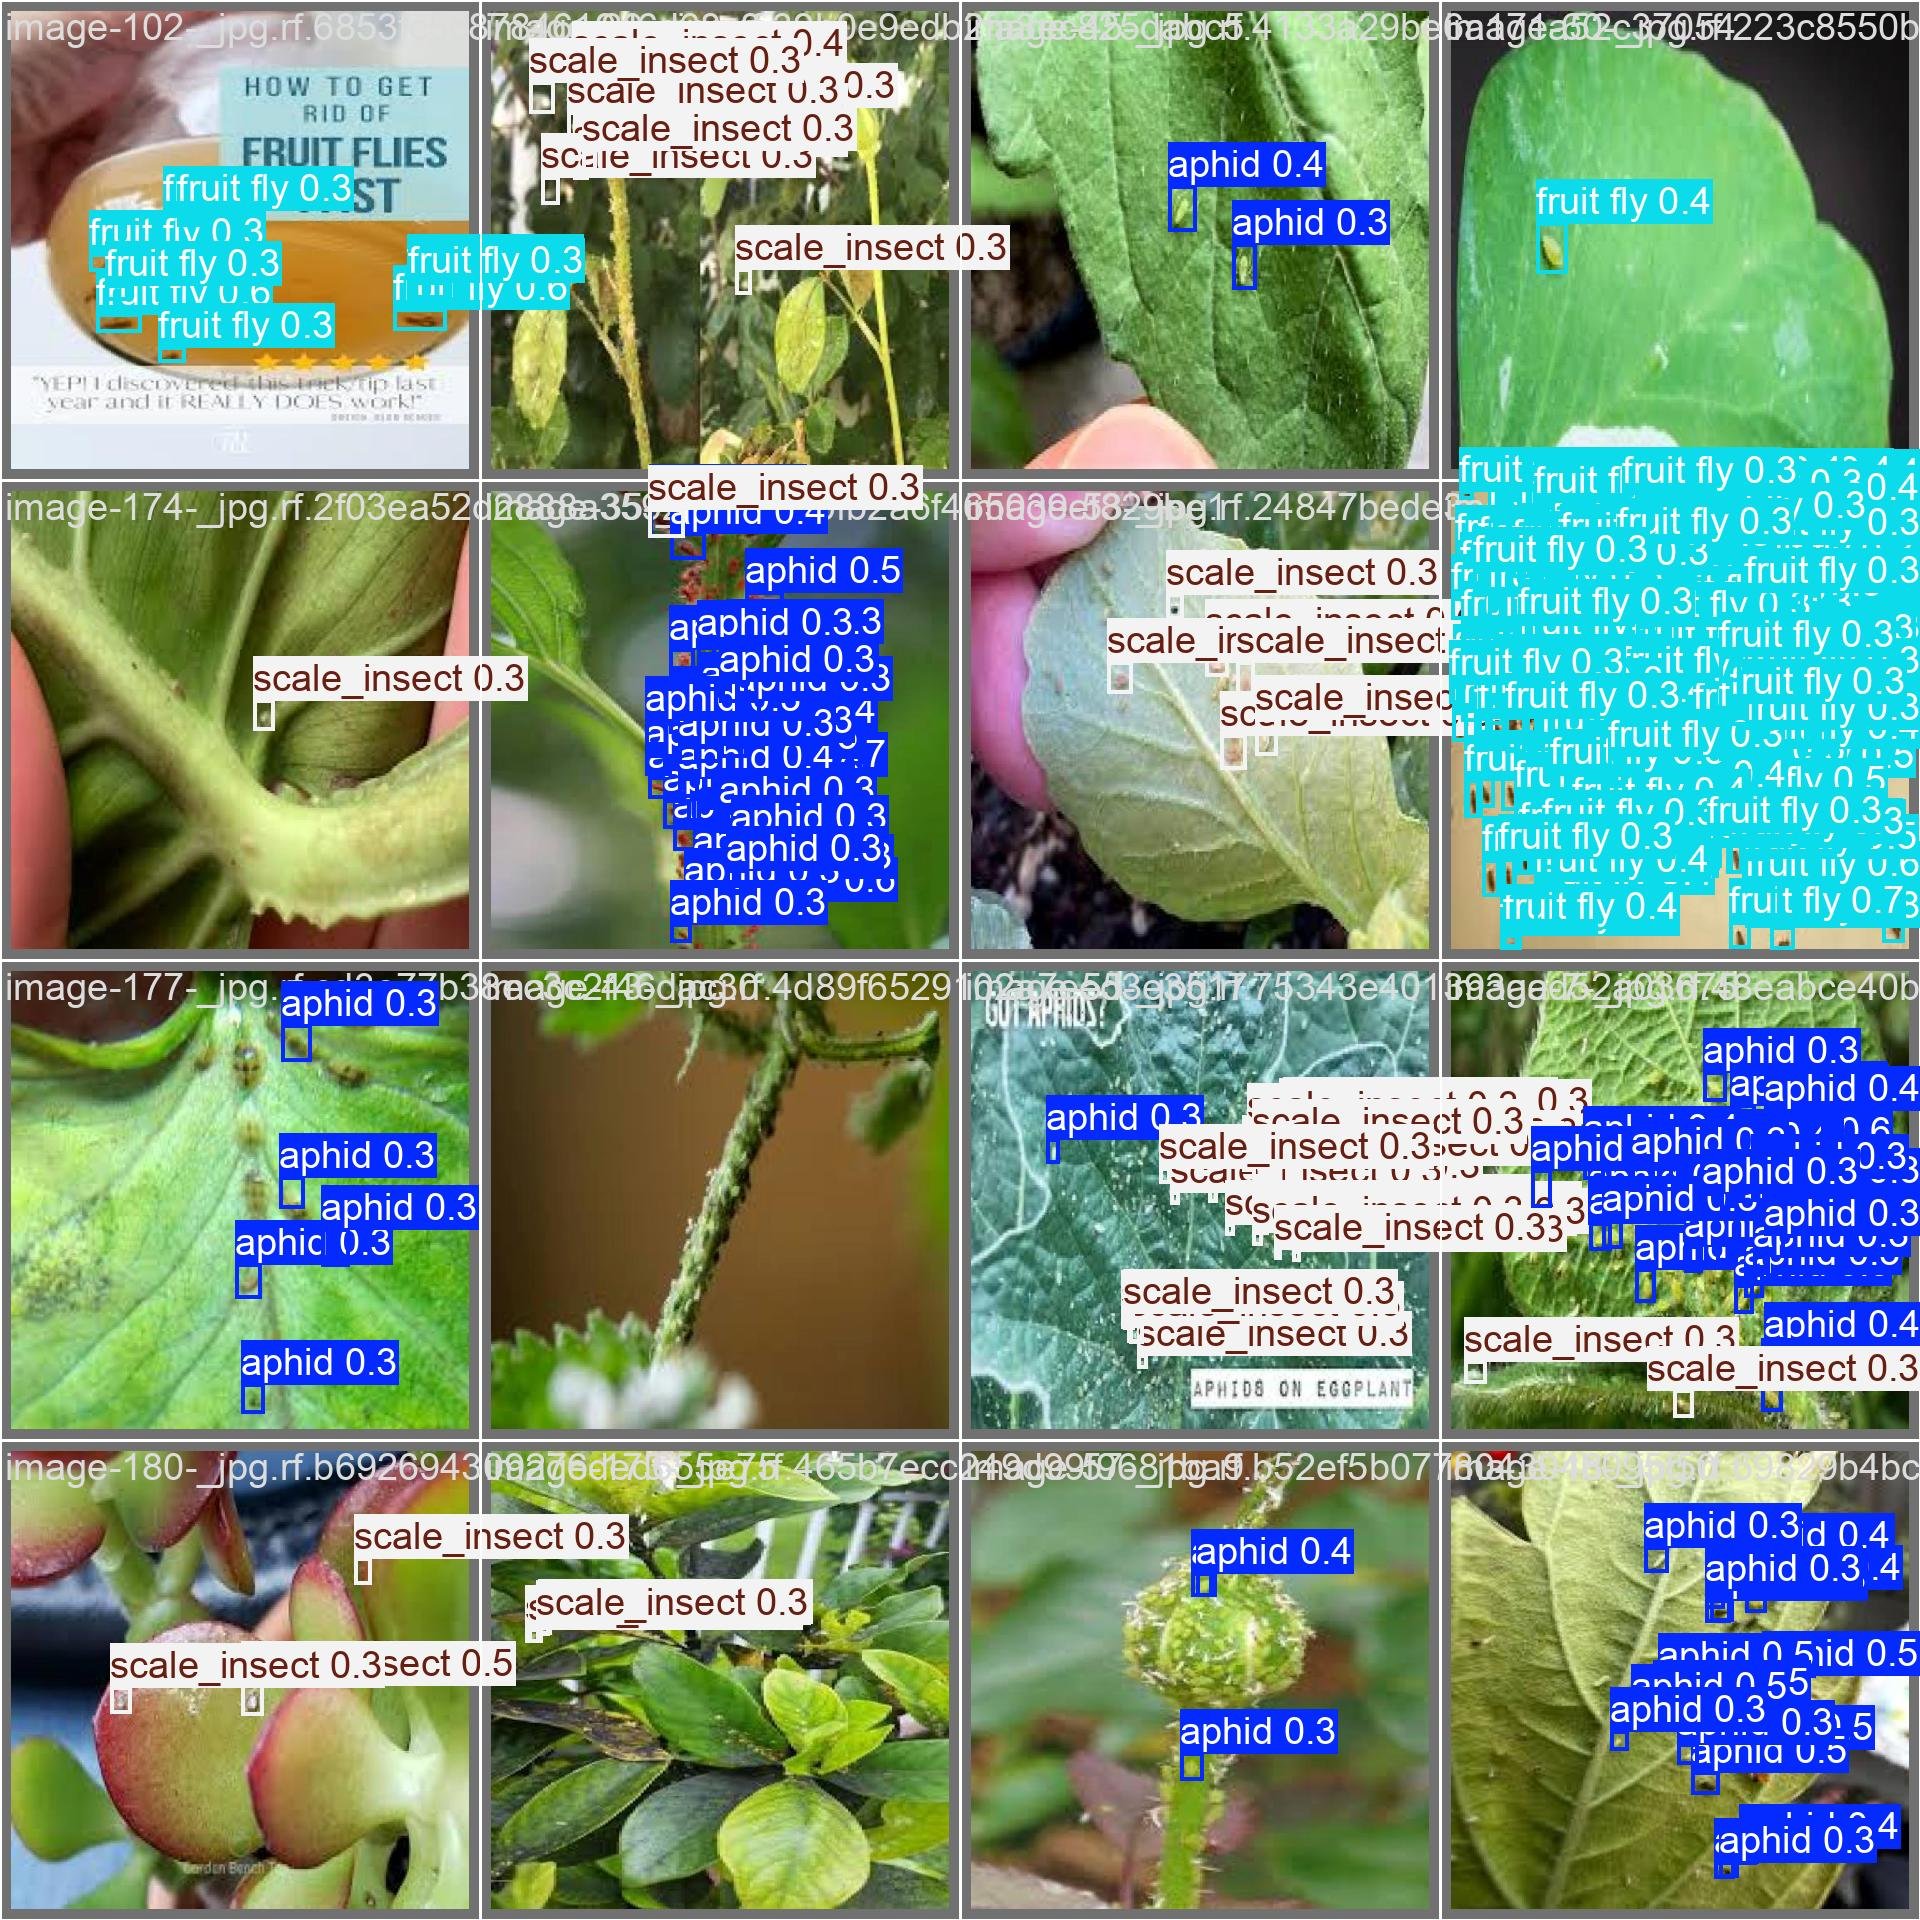

In [ ]:
# Rename the variable from Image to image_path to avoid overwriting the imported Image function
image_path = "/content/runs/detect/train2/val_batch0_pred.jpg"

# Re-import the Image function in case it was overwritten
from IPython.display import display, Image

# Display the image using the imported Image function and the new variable name
display(Image(filename=image_path))



In [ ]:
!yolo detect val model=/content/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/yolo_dataset/data.yaml


Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 21.9±11.8 MB/s, size: 45.8 KB)
val: Scanning /content/drive/MyDrive/yolo_dataset/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.06it/s]
                   all         36        993      0.542       0.54      0.493      0.189
                 aphid         11        263      0.576      0.232       0.31      0.124
             fruit fly          5        313      0.604      0.748      0.674       0.24
          scale_insect         20        417      0.446       0.64      0.494      0.201
Speed: 5.9ms preprocess, 26.3ms inference, 0.0ms loss, 12.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https:

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolo_dataset/test/images save=True


Ultralytics 8.3.135 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/18 /content/drive/MyDrive/yolo_dataset/test/images/image-115-_jpg.rf.fe4c2ba33508977bd44d6579ee1c186f.jpg: 672x672 4 aphids, 13 scale_insects, 8.0ms
image 2/18 /content/drive/MyDrive/yolo_dataset/test/images/image-119-_jpg.rf.1f860efcddd62aaba003122d9518fb25.jpg: 672x672 (no detections), 8.0ms
image 3/18 /content/drive/MyDrive/yolo_dataset/test/images/image-125-_jpg.rf.33709e3424d3d0a22a57edc9834007f9.jpg: 672x672 7 fruit flys, 8.0ms
image 4/18 /content/drive/MyDrive/yolo_dataset/test/images/image-13-_jpg.rf.a535af1d82d41058b977542a7611f5da.jpg: 672x672 (no detections), 8.0ms
image 5/18 /content/drive/MyDrive/yolo_dataset/test/images/image-139-_jpg.rf.8b0897c68e917c69013ac82b65562234.jpg: 672x672 2 aphids, 17 scale_insects, 8.0ms
image 6/18 /content/drive/MyDrive/yolo_dataset/test/images/image-14-_jpg.rf.7f47dae4cca6

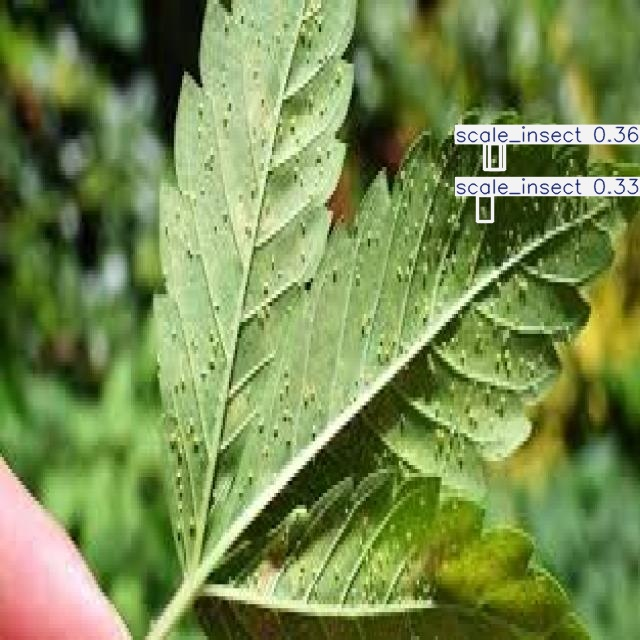

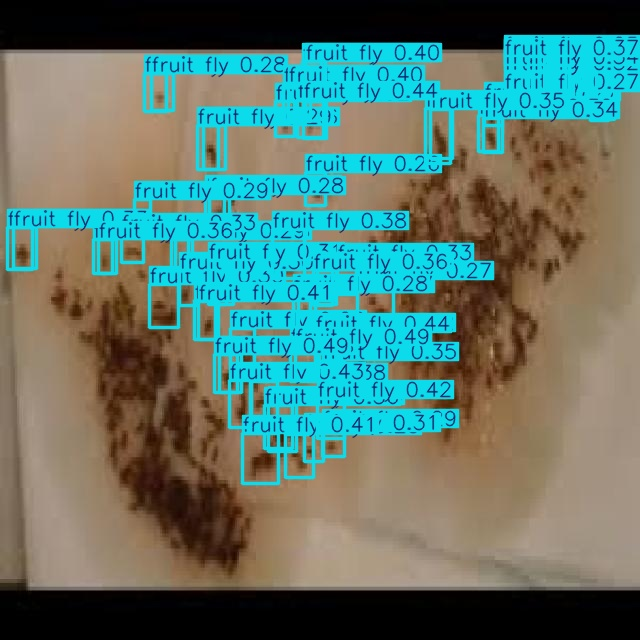

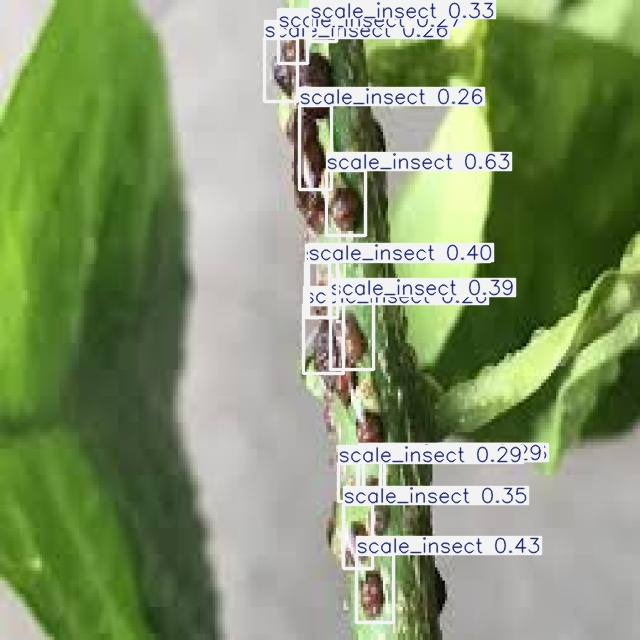

In [ ]:
import glob
from IPython.display import Image, display

# Correct the base path to start from /content
for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")
